### Visualization

To visualize our results, we can run the following R code. First install and load required libraries

In [52]:
# install.packages("ggplot2")
# install.packages("dplyr")

library(ggplot2)
library(dplyr)

Load results from Kraken run

In [53]:
dat <- read.table("../05-taxonomic_profiling/kraken/counts_forR.txt", header=T)
head(dat)
dat$Level <- factor(dat$Level, levels=c("species", "genus", "other", "unassigned"))
samp.list <- levels(dat$Sample)

Sample,Level,Value
Zmays_5k,unassigned,3299
Zmays_5k,other,80
Zmays_5k,genus,82
Zmays_5k,species,1539
Taestivum_5k,unassigned,3533
Taestivum_5k,other,414


Eukaryotic lollipop charts (Figure 2). All will be stored in figs folder

In [54]:
for(i in 1:length(samp.list)){
	x <- dat %>%
		filter(Sample == samp.list[i]) %>%
		select(Level, Value)
	xlimit <- sum(x$Value)
	pdf(paste("../figs/", samp.list[i], "_lolipop.pdf", sep=""))
	p <- ggplot(x, aes(Value, Level)) +
        geom_segment(aes(x=0, y=Level, xend=Value, yend=Level), size=3) +
        geom_point(size=10) + xlim(c(0, xlimit)) + theme_minimal()
    print(p)
    dev.off()
}


What does one of these plots look like?

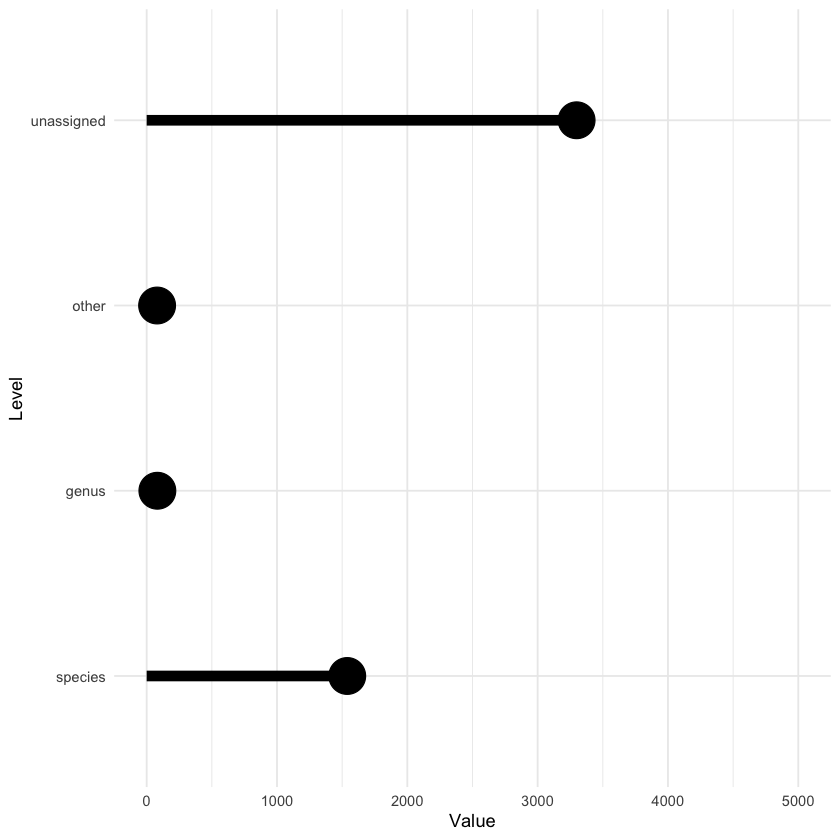

In [55]:
print(p)

Eukaryotic pie charts (not in manuscript)

In [56]:
for(i in 1:length(samp.list)){
	x <- dat %>%
		filter(Sample == samp.list[i]) %>%
		select(Level, Value)
	xlimit <- sum(x$Value)
	pdf(paste("../figs/", samp.list[i], "_piechart.pdf", sep=""))
	pie(x$Value, labels=c("Unclassified", "Other", "Genus", "Species"), col=c("#0868ac", "#43a2ca", "#bae4bc", "#7bccc4"))
    dev.off()
}

What do the pie charts look like?

Level,Value
unassigned,3299
other,80
genus,82
species,1539


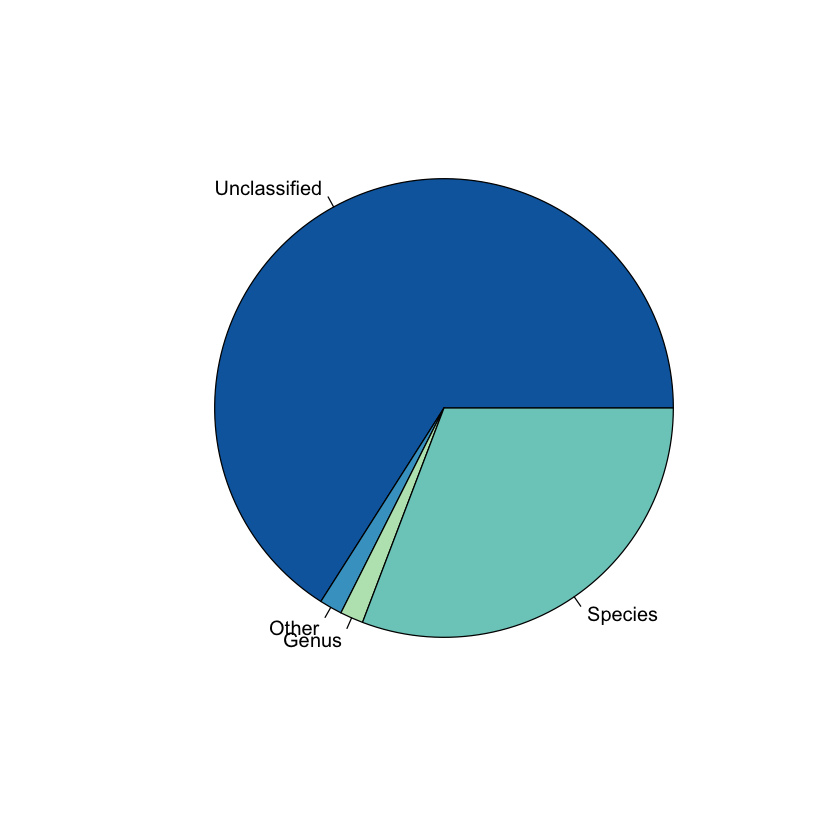

In [57]:
head(x)
pie(x$Value, labels=c("Unclassified", "Other", "Genus", "Species"), col=c("#0868ac", "#43a2ca", "#bae4bc", "#7bccc4"))

Correlation between genome availability on NCBI and recovered species level reads (Supplementary Figure 2)

pdf 
  2

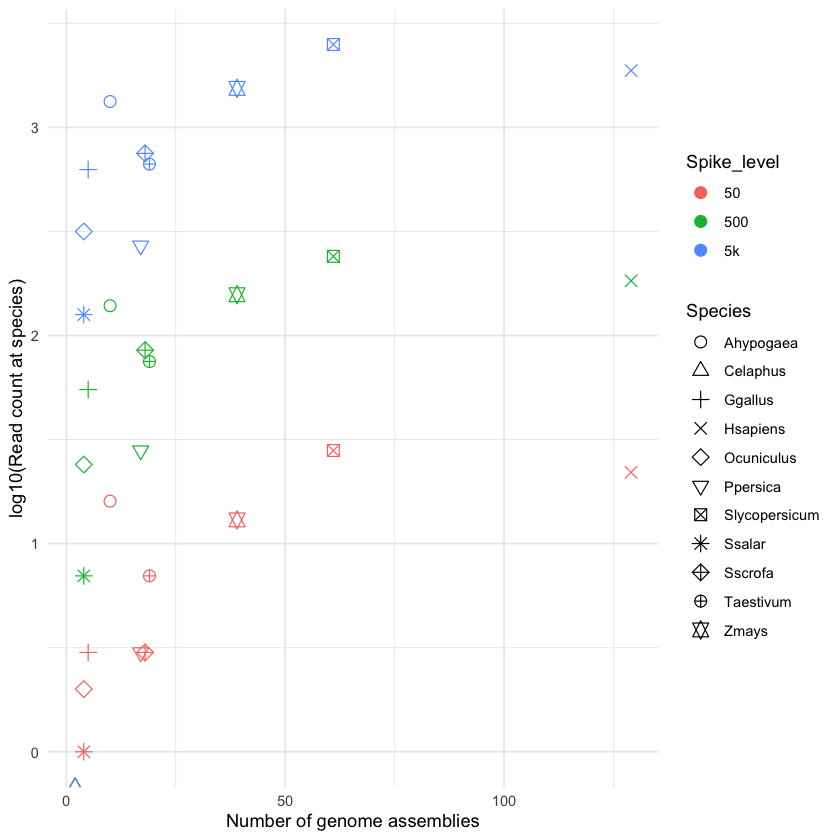

In [58]:
dat <- read.table("../05-taxonomic_profiling/kraken/correlation.txt", header=T)
pdf("../figs/genome_size_species_reads.pdf")
ggplot(dat, aes(x=Num_genomes, y=log10(Value), 
	color=Spike_level, 
	shape=Species)) + 
	geom_point(size=3) + 
	scale_shape_manual(values=c(1:11)) + 
	theme_minimal() + 
	xlab("Number of genome assemblies") + 
	ylab("log10(Read count at species)")
dev.off()

# print to notebook
ggplot(dat, aes(x=Num_genomes, y=log10(Value), 
	color=Spike_level, 
	shape=Species)) + 
	geom_point(size=3) + 
	scale_shape_manual(values=c(1:11)) + 
	theme_minimal() + 
	xlab("Number of genome assemblies") + 
	ylab("log10(Read count at species)")

Correlation across all spike in levels

In [59]:
cor(dat$Value, dat$Num_genomes)

[1] 0.3453796

Plot with humans removed

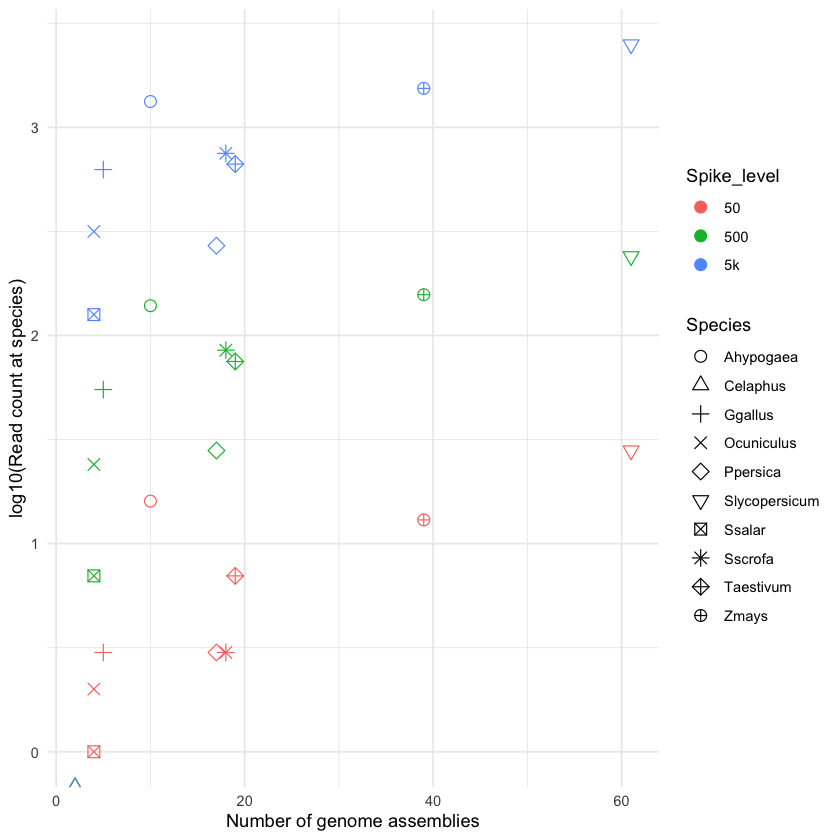

In [60]:
dat.r <- dat[-c(10,11,12),]
ggplot(dat.r, aes(x=Num_genomes, y=log10(Value), 
	color=Spike_level, 
	shape=Species)) + 
	geom_point(size=3) + 
	scale_shape_manual(values=c(1:11)) + 
	theme_minimal() + 
	xlab("Number of genome assemblies") + 
	ylab("log10(Read count at species)")

Correlation just across 5k spike in level

In [61]:
dat <- read.table("../05-taxonomic_profiling/kraken/correlation_5k.txt", header=T)
cor(dat$Value, dat$Num_genomes, method="spearman")
# without human
dat.r <- dat[-c(4),]
cor(dat.r$Value, dat.r$Num_genomes, method="spearman")

[1] 0.8747175

[1] 0.8449887

500 reads

In [62]:
dat <- read.table("../05-taxonomic_profiling/kraken/correlation_500.txt", header=T)
cor(dat$Value, dat$Num_genomes, method="spearman")
# without human
dat.r <- dat[-c(4),]
cor(dat.r$Value, dat.r$Num_genomes, method="spearman")

[1] 0.9066083

[1] 0.8875421

50 reads

In [63]:
dat <- read.table("../05-taxonomic_profiling/kraken/correlation_50.txt", header=T)
cor(dat$Value, dat$Num_genomes, method="spearman")
# without human
dat.r <- dat[-c(4),]
cor(dat.r$Value, dat.r$Num_genomes, method="spearman")

[1] 0.8781818

[1] 0.849267

Genome size correlation (Not in manuscript)

In [64]:
# 5k spike in
dat <- read.table("../05-taxonomic_profiling/kraken/correlation_5k_size.txt", header=T)
cor(dat$Value, dat$Genome_size.Mb.)
# 500 spike in
dat <- read.table("../05-taxonomic_profiling/kraken/correlation_500_size.txt", header=T)
cor(dat$Value, dat$Genome_size.Mb.)
# 50 spike in
dat <- read.table("../05-taxonomic_profiling/kraken/correlation_50_size.txt", header=T)
cor(dat$Value, dat$Genome_size.Mb.)

[1] -0.1442868

[1] -0.1055102

[1] -0.1004729

Example mapdamage figure

In [ ]:
dat <- read.table("../")